<a href="https://colab.research.google.com/github/jordantcarlisle/eda-example/blob/main/Example_of_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting started with exploratory data analysis

Exploratory data analysis is a critical process in data science. It's the first thing you do to begin working with a new dataset and will influence analytical design decisions througout a project. 


In thie example, we will demonstrate an exploratory data analysis process using python in Google Colab. If you'd like to follow along, it's as easy as going to https://colab.research.google.com adding code blocks, copying what's in this notebook, and running the cells. 


If you need/want a deeper explaination, here's a fancy video from the Google TensorFlow team - https://www.youtube.com/watch?v=inN8seMm7UI 

Inspiration and ideas for this tutorial came from this post on Towards Data Science titled [An Extensive Step by Step Guide to Exploratory Data Analysis](https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e) by Terence Shin

Here's the repo on Github if you'd like to use the data for other cryptos to follow along - https://github.com/jordantcarlisle/eda-example

## The Setup

The primary reason why python is commonly used for data science is the robust ecosystem of open-source libraries that make working with data easy, fast, and affordable. 

You don't need to be an expert programmer to get started, you don't need any special equipment or software, and everything is free. All you need is a ipython notebook (Google Colab is free) and about 20 minutes. 

In [50]:
# Importing python libraries
# Numpy for data manipulation
import numpy as np
# Pandas for handling data and turning it into data frames
import pandas as pd
# Matplot and Seaborn for basic data visualizations
import matplotlib.pylab as plt
import seaborn as sns

In [51]:
# Reading BTC data into the notebook's working memory with Pandas ".pd". 
btc = pd.read_csv('https://raw.githubusercontent.com/jordantcarlisle/eda-example/main/coin_Bitcoin.csv')

# Here is how you would read data in for other cryptos from my Github 
# eth = pd.read_csv('https://raw.githubusercontent.com/jordantcarlisle/eda-example/main/coin_Ethereum.csv')
# sol = pd.read_csv('https://raw.githubusercontent.com/jordantcarlisle/eda-example/main/coin_Solana.csv')

## 1. Understanding Your Variables

In [52]:
# Print the shape of the data to understand the size of the data. 
# Is it wide? Is it deep? 
# Does the shape match other datasets that we might join it with? 

print(btc.shape)

(2991, 10)


In [53]:
# Checking a random sample of the data to see the columns with real data. 
# This can be helpful for sniffing out missing data and data types
btc.sample(10)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
1933,1934,Bitcoin,BTC,2018-08-14 23:59:59,6287.940000,5971.050000,6287.660000,6199.710000,5.301700e+09,1.066964e+11
2120,2121,Bitcoin,BTC,2019-02-17 23:59:59,3680.537288,3619.182130,3633.359480,3673.836293,7.039513e+09,6.445337e+10
1828,1829,Bitcoin,BTC,2018-05-01 23:59:59,9255.879883,8891.049805,9251.469727,9119.009766,7.713020e+09,1.551141e+11
1025,1026,Bitcoin,BTC,2016-02-18 23:59:59,425.996002,415.638000,416.571991,422.372986,7.675260e+07,6.431548e+09
343,344,Bitcoin,BTC,2014-04-07 23:59:59,462.563995,445.122009,461.473999,449.423004,1.561660e+07,5.670831e+09
18,19,Bitcoin,BTC,2013-05-17 23:59:59,125.300003,116.570999,118.209999,123.014999,0.000000e+00,1.373724e+09
1586,1587,Bitcoin,BTC,2017-09-01 23:59:59,4892.009766,4678.529785,4701.759766,4892.009766,2.599080e+09,8.090504e+10
1592,1593,Bitcoin,BTC,2017-09-07 23:59:59,4655.040039,4491.330078,4589.140137,4599.879883,1.844620e+09,7.613284e+10
1247,1248,Bitcoin,BTC,2016-09-27 23:59:59,608.247986,604.109985,608.021973,606.166016,4.942240e+07,9.633311e+09
2111,2112,Bitcoin,BTC,2019-02-08 23:59:59,3695.613975,3391.023752,3401.376433,3666.780351,7.735623e+09,6.427027e+10


In [54]:
# You can also check out the exact column names, which is important when you 
# want to call a specific column to see data. If there are extra spaces or characters
# in the names, you would be able to see them within the '' . 
btc.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [55]:
# Checking to see how many unique values each column has
# This isn't particularly useful for this dataset, because
# we're working with continous data tha we expect to have lots of value 
# and we're only looking at one crypto "Bitcoin". This would be a useful step
# if we added other cryptos to the data. 

btc.nunique(axis=0)

SNo          2991
Name            1
Symbol          1
Date         2991
High         2981
Low          2985
Open         2984
Close        2978
Volume       2750
Marketcap    2990
dtype: int64

In [56]:
# Here we see summary statistics for all numerical data. 
# Record count, mean value, standard deviation from the mean, minimum, 
# maximium, and the quartile points including median. 

btc.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,10906334004.866846,120876059112.884201
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,18888952979.843426,210943836987.404938
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000,778411178.875000
25%,748.500000,436.179001,422.879486,430.445496,430.569489,30367250.000000,6305579328.825000
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,946035968.000000,37415031060.800003
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,15920149610.468849,149995739945.594482
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,350967941479.059998,1186364044140.270020


In [58]:
# Creating a new feature of this dataset that's the difference between daily high 
# and low called 'Delta'. This will make things a bit more interesting. 
btc['Delta'] = abs(btc['High'] - btc['Low'])

In [59]:
btc.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Delta
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,13.488007
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,12.879990
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,32.169998
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,33.318100
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,29.028000


## 2. Cleaning your dataset

Based on the exploratory data analysis article that this exercise is based on, we would follow the following steps if needed. These crypto datasets are coming from exchanges that have solid apis, so all the data is clean and none of it is redundant. We could remove 'Name' or 'Symbol' but it's fine to keep them for context and for potentially merging this data with other cryptos later. 

1. Removing Redundant variables
2. Variable Selection
3. Removing Outliers
4. Removing Rows with Null Values

In [60]:
# use the commmented code below to drop columns if needed
# btc = btc.copy().drop(['Name', 'Symbol'], axis=1)

## 3. Analyzing relationships between variables

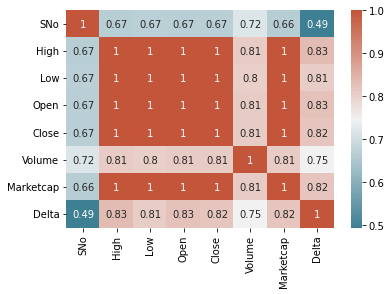

In [61]:
# calculate correlation matrix
# this is useful to see what might be interesting to investigate
# All the 1s are boring
# Volume seems to be the most interesting feature
corr = btc.corr() # plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

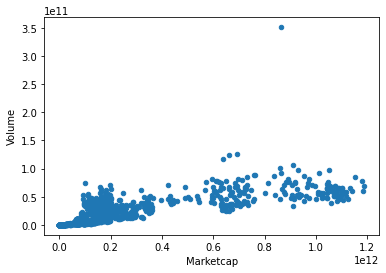

In [63]:
# Let's take a look at the volume and market cap data
btc.plot(kind='scatter', x='Marketcap', y='Volume')

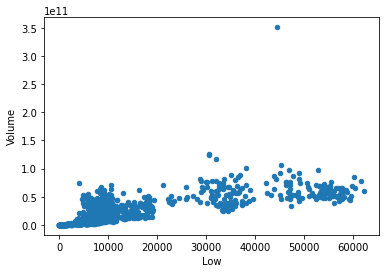

In [64]:
# Let's take a look at the volume and daily low. 
# It was only slightly less correlated than the other data
# so not there's very little difference. 
btc.plot(kind='scatter', x='Low', y='Volume')

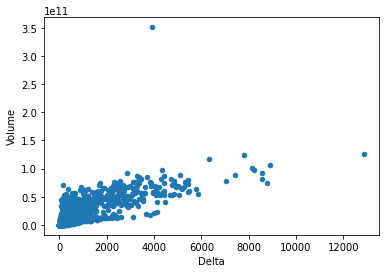

In [65]:
# Finally, let's look at the daily volume versus
# the maximum daily differece in price
btc.plot(kind='scatter', x='Delta', y='Volume')

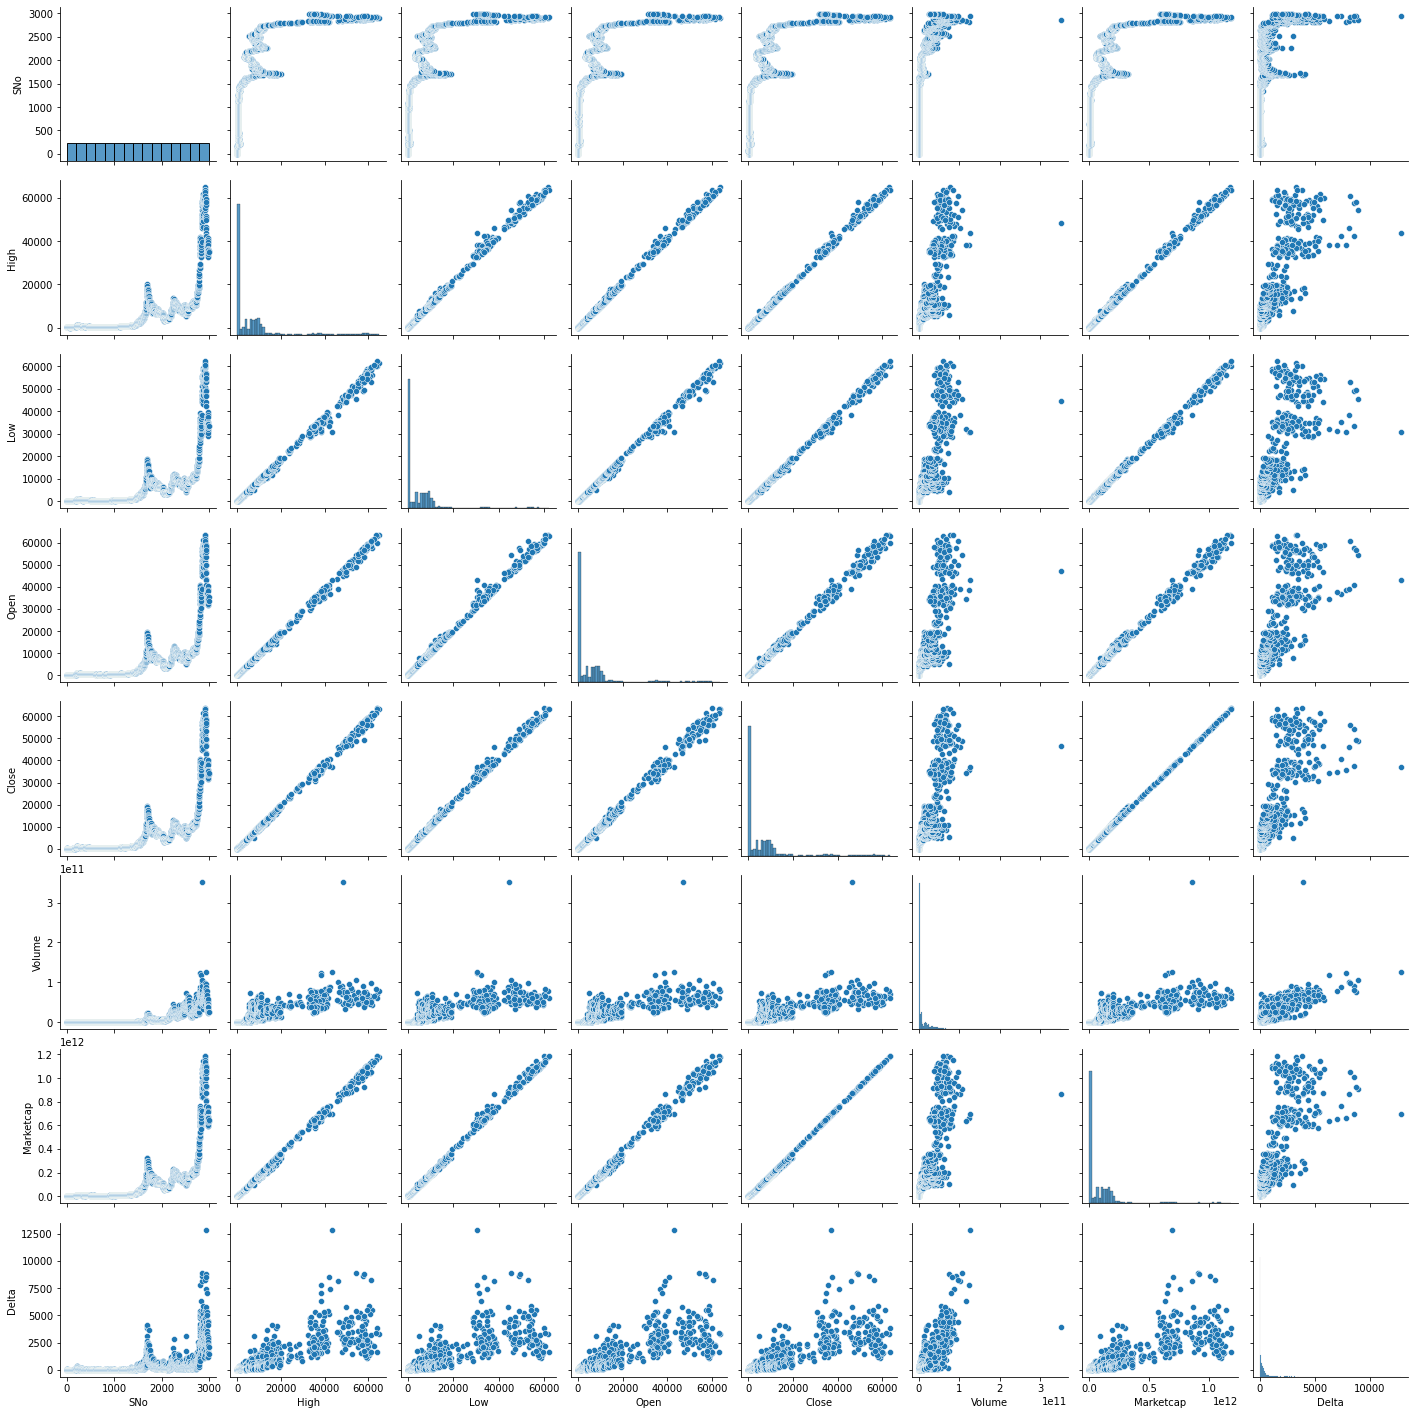

In [62]:
# Another way of exploring these relationships is using Seaborn's pairplot
# This gives you every numerical feature compared to every numerical feature in
# one shot. This is super useful in jump starting your analysis. 
sns.pairplot(btc)

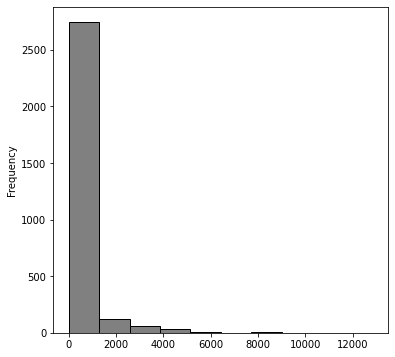

In [89]:
# We can also use histograms to check the distribution of data for one variable
# below is the daily Delta divided into 10 equally sized ranges and totalled for
# each range. We could segment our data for a deeper dive into a time period and
# that would probably be more useful. 
btc['Delta'].plot(kind='hist', bins=10, figsize=(6,6), facecolor='grey',edgecolor='black')

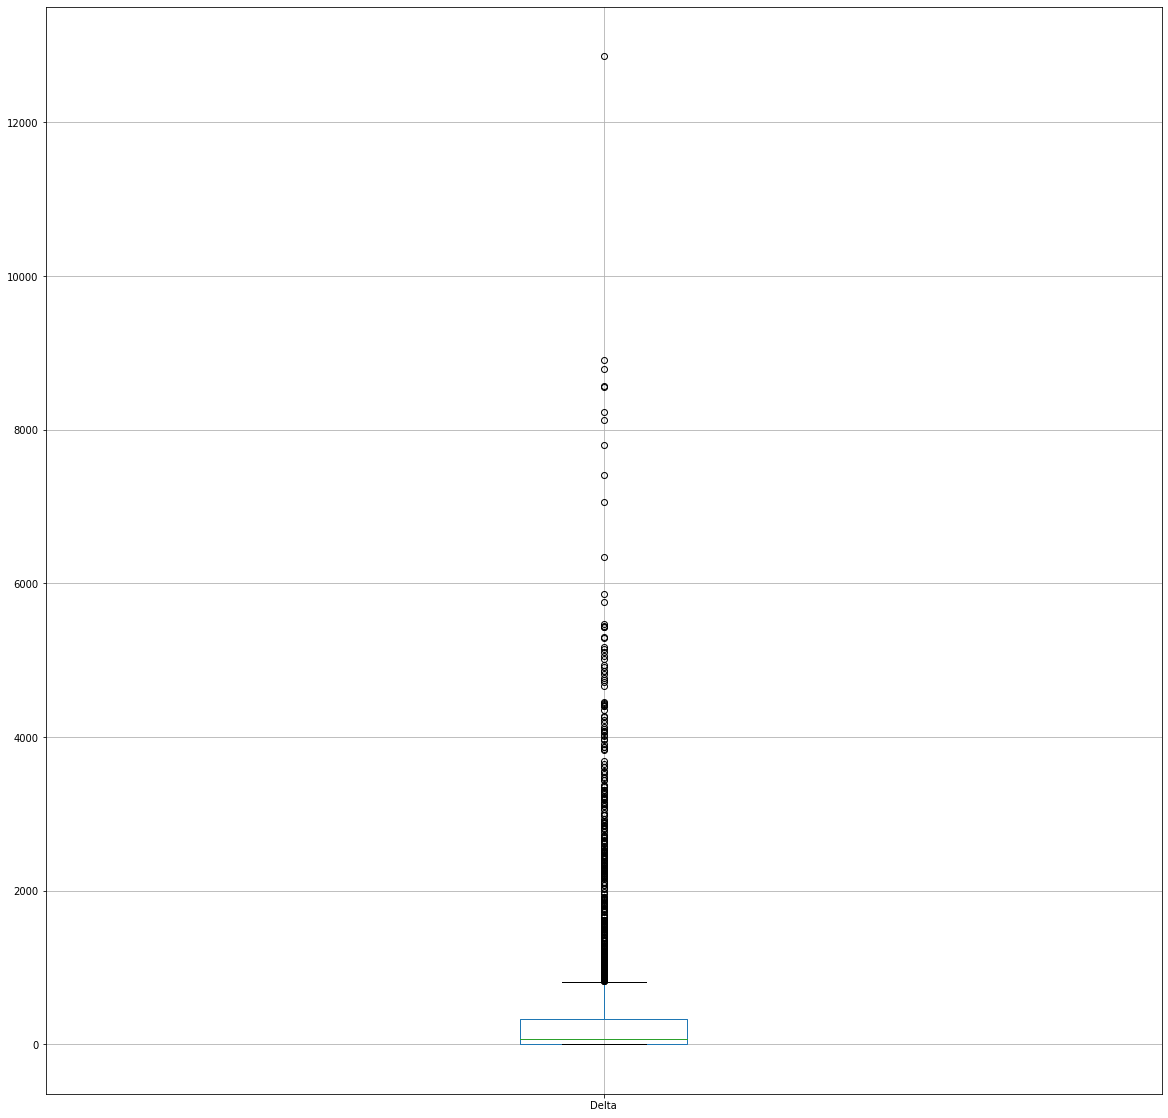

In [90]:
# And finally, here is a visual for the distribution and summary
# statistics for one specific column. This one is Delta again. 
btc.boxplot('Delta', figsize=(20,20))

## 4. Conclusion
This was a quick and simple example of how you can use python libraries to quickly explore data without needing to know a ton of math or programming. Learning to use these libraries are the gateway into doing even more creative and interesting things with data. 

As you can see from my examples, there is a lot more we could do like adding additional cryptos to the data, engineering new features like Delta, and segmenting the data down into specific time frames to get a more nuanced view of the data. 

